In [1]:
from pynq import PL
from pynq.overlay import Overlay
from pynq import MMIO


PL.reset()

overlay = Overlay("/home/py/python/modules/scope/scope.bit")

# import numpy as np
# from pynq import allocate
# from pynq import Overlay
# import matplotlib.pyplot as mp

# input_buffer = allocate(shape=(128,), dtype=np.uint16)

# dma = overlay.axi_dma
# recvstatus = dma.recvchannel.running

# dma.buffer_max_size

# dma.recvchannel.transfer(input_buffer)
# dma.recvchannel.wait_async()

# mp.plot(input_buffer)

(400,)


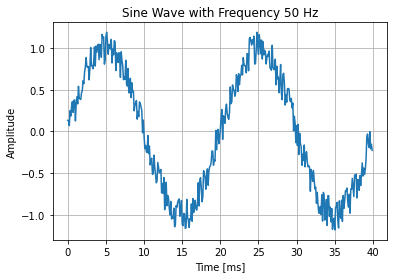

In [60]:
import numpy as np

import matplotlib.pyplot as plt





frequency = 50
amplitude = 1
sampling_rate = 10000
duration = 0.04

noise = np.random.uniform(low=-0.2,high=0.2,size=(int(sampling_rate * duration)))

t = np.linspace(start=0,stop=duration,num=int(sampling_rate*duration),endpoint=False)

y = amplitude * np.sin(2 * np.pi * frequency *t) + noise

print(noise.shape)

plt.plot(t*1000,y)
plt.title(f'Sine Wave with Frequency {frequency} Hz')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [5]:
sp = fftshift(fft(y))/(duration * sampling_rate * 0.5)
freq = scipy.fft.fftshift(scipy.fft.fftfreq(t.shape[-1]))

freq = abs(freq * sampling_rate)

print(t.shape[-1])


plt.semilogy(freq,abs(sp.imag))


NameError: name 'scipy' is not defined

In [57]:


adc = overlay.xadc

channel = 0x10 +14

print(channel)

register = channel * 4

raw_value = adc.read(0x200 +register)

shifted_value = raw_value >> 4 

voltage = shifted_value/4096

print(voltage)






30
0.283935546875


[0.994326, 1.041402, 1.077144, 1.112154, 1.147374, 1.427802, 1.488588, 1.527546, 1.565268, 1.602768, 1.637802, 1.67178, 1.705086, 1.738044, 1.770354, 1.802274, 1.836984, 1.870698, 1.955916, 2.003514, 2.03808, 2.071626, 2.104092, 2.1366, 2.170866, 2.204154, 2.23722, 2.270358, 2.30277, 2.335548, 2.3688, 2.410824, 2.46186, 2.50476, 2.571024, 2.606718, 2.639418, 2.672604, 2.70603, 2.739144, 2.77317, 2.80824, 2.84202, 2.875632, 2.907576, 2.93997, 2.97201, 3.003456, 3.034962, 3.067026, 3.099462, 3.133212, 3.168036, 3.203688, 3.237162, 3.269862, 3.302382, 3.336366, 3.37023, 3.403824, 3.43698, 3.469098, 3.501126, 3.53295, 3.568002, 3.602106, 3.634782, 3.666816, 3.699372, 3.732324, 3.763842, 3.795942, 3.828162, 3.860208, 3.891504, 3.923574, 3.957906, 3.993696, 4.02618, 4.058532, 4.090812, 4.123356, 4.155894, 4.187418, 4.218972, 4.251648, 4.284588, 4.317492, 4.349568, 4.38147, 4.413066, 4.44591, 4.481496, 4.517922, 4.552368, 4.585152, 4.618056, 4.650822, 4.683234, 4.716432, 4.749228, 4.782102, 4

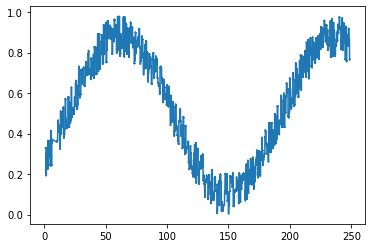

In [95]:
from pynq import PL
from pynq.overlay import Overlay
from pynq import MMIO
import time

PL.reset()

overlay = Overlay("/home/py/python/modules/base/base.bit")
adc = overlay.xadc
channel = 0x10 +14
register = channel * 4
y = []
t = []
start = time.perf_counter_ns()
for _ in range(7500):
    y.append((adc.read(0x200 + register) >> 4)/4096)
    t.append((time.perf_counter_ns() - start)/1e6)


plt.plot(t,y)
plt.show()

In [80]:
import numpy as np
from pynq import allocate
from pynq import Overlay
import matplotlib.pyplot as mp
dma = overlay.axi_dma_ad0
recvstatus = dma.recvchannel.running
recvstatus



True

In [84]:
dma.buffer_max_size
input_buffer = allocate(shape=(32,), dtype=np.uint16)
dma.recvchannel.transfer(input_buffer)
dma.recvchannel.wait_async()

print(input_buffer)

mp.plot(input_buffer)

RuntimeError: DMA channel not started

In [112]:
xadc_base_address = overlay.ip_dict['xadc_temp']['phys_addr']
xadc_range = overlay.ip_dict['xadc_temp']['addr_range']
xadc = MMIO(xadc_base_address, xadc_range)


temperature_register = 0x200 + 0x0
temp_raw = xadc.read(temperature_register)

print(temp_raw)

temp_raw >>= 4
print(temp_raw)



temperature = ((temp_raw * 503.975)/4096)-273.15


print(temperature)




# channels = np.arange(0,4000,4)

# for channel in channels:
#     register = 0x200 + channel
#     raw = xadc.read(register)
#     raw >>=4
#     print(raw)
#     raw_converted = raw/4096
#     print(raw_converted)

41670
2604
47.24816894531256


[150 134 152 176 154 153 169 159 190 176 192 169 167 188 186 189 204 199
 188 218 196 217 214 228 222 239 214 214 221 213 232 223 242 252 247 242
 233 230 231 231 225 245 260 230 265 234 261 252 255 249 250 230 245 245
 254 234 234 247 250 250 241 263 238 239 240 244 233 223 251 234 221 227
 225 237 211 207 205 231 204 214 198 199 188 194 196 215 183 181 185 196
 199 166 178 155 180 179 147 162 169 136 163 129 163 125 147 141 136 128
 122 138 132 126 124 130 108  87 116  84 109 105  75  92  70  70  83  78
  79  57  87  68  63  71  48  62  45  45  55  79  56  49  61  35  46  46
  44  41  66  64  35  68  32  55  36  54  43  65  64  58  38  58  73  39
  42  39  66  74  64  60  78  82  76  63  72  77  90  73  97  78  88  78
 107  84 103 115 106 103  94 102 131 105 120 131 109 134 128 121 125 134
 141 140 142 134 171 159 165 162 164 165 168 192 167 165 201 194 194 182
 197 193 190 193 204 230 199 231 207 229 203 223 242 246 224 239 250 250
 230 223 220 247 236 249 257 232 234 253 232 234 24

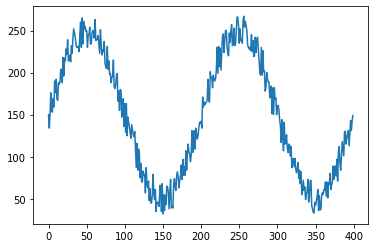

In [31]:
yy = y * 100

yyy = yy.astype(dtype = np.int32) + 150
print(yyy)



plt.plot(yyy)

In [43]:
import time

mult = 10000

Q = 1e-4 * mult
R = 0.1 * mult


P_k = 1 * mult
z_k = 0.39 * mult

P_k_prev = 1 * mult
x_k_prev = 0

overlay.kalman_filter.write(0x10, int(z_k))
overlay.kalman_filter.write(0x48, int(P_k_prev))
overlay.kalman_filter.write(0x50, int(x_k_prev))
overlay.kalman_filter.write(0x38,int(Q))
overlay.kalman_filter.write(0x40,int(R))



In [44]:
overlay.kalman_filter.read(0x28)/10000
# print(int(Q))
# print(int(R))
# print(int(z_k))
# print(int(P_k_prev))
# print(int(x_k_prev))

0.3545

In [45]:
P_k_prev = overlay.kalman_filter.read(0x18)
x_k_prev = overlay.kalman_filter.read(0x28)
z_k = 0.5 * mult

overlay.kalman_filter.write(0x10, int(z_k))
overlay.kalman_filter.write(0x48, int(P_k_prev))
overlay.kalman_filter.write(0x50, int(x_k_prev))
overlay.kalman_filter.write(0x38,int(Q))
overlay.kalman_filter.write(0x40,int(R))

In [46]:
overlay.kalman_filter.read(0x28)/10000

0.4238

0.3545
0.4238
0.4419
0.4047
0.3742
0.3652
0.3616
0.3764
0.3802
0.3873


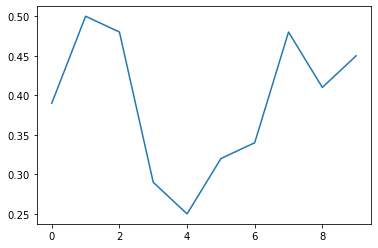

In [59]:
readings = [0.39,0.5,0.48,0.29,0.25,0.32,0.34,0.48,0.41,0.45]

filtered = readings.copy()

mult = 10000

Q = 1e-4 * mult
R = 0.1 * mult


P_k = 1 * mult


P_k_prev = 1 * mult
x_k_prev = 0



for reading in range(len(readings)):
    z_k = readings[reading] * mult
    overlay.kalman_filter.write(0x10, int(z_k))
    overlay.kalman_filter.write(0x48, int(P_k_prev))
    overlay.kalman_filter.write(0x50, int(x_k_prev))
    overlay.kalman_filter.write(0x38,int(Q))
    overlay.kalman_filter.write(0x40,int(R))

    P_k_prev = overlay.kalman_filter.read(0x18)
    x_k_prev = overlay.kalman_filter.read(0x28)
    filtered[reading] = x_k_prev / mult
    print(filtered[reading])


plt.plot(readings)

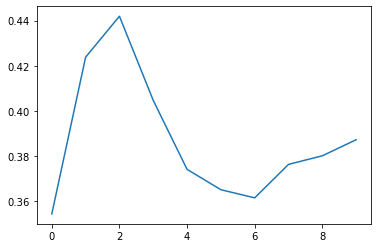

In [60]:
plt.plot(filtered)